# **Adult Income Prediction**

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.


**Attribute Information:**

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.(sermaye kazancı)

capital-loss: Continuous.(sermaye kaybı)

Bu tür sütunlar, kişilerin finansal durumu ve gelir düzeyiyle ilgili değerli bilgiler sağlayabilir. Örneğin, yüksek sermaye kazancı olan kişilerin geliri genellikle yüksek olabilir, bu da onları yüksek gelirli grubuna dahil etmeyi destekleyebilir. Benzer şekilde, yüksek sermaye kaybı olan kişilerin geliri düşük olabilir ve düşük gelirli grup içinde yer alabilirler.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

# Exploratory Data Analysis and Visualization

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("adult.csv")
df.sample(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
13793,24,Private,182276,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,25,United-States,<=50K
27801,19,?,140590,12th,8,Never-married,?,Own-child,Black,Male,0,0,30,United-States,<=50K
32199,42,Local-gov,101593,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,42,United-States,<=50K
9842,55,Private,163083,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
23574,27,Private,217530,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
20075,59,?,556688,9th,5,Divorced,?,Not-in-family,White,Female,0,0,12,United-States,<=50K
27071,52,Private,273514,HS-grad,9,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
5754,29,Private,52199,HS-grad,9,Married-spouse-absent,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32290,51,Self-emp-inc,28765,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
2420,41,Private,67339,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,7688,0,40,United-States,>50K


In [4]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
output_data = []
for col in df.columns:
    
    # If the number of unique values in the column is less than or equal to 10
    if df.loc[:, col].nunique() <= 10:
        # Get the unique values in the column
        unique_values = df.loc[:, col].unique()
        # Append the column name, number of unique values, unique values, and data type to the output data
        output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
    else:
        # Otherwise, append only the column name, number of unique values, and data type to the output data
        output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])
output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])
output_df



,Column Name,Number of Unique Values,Unique Values,Data Type
0,age,73,-,int64
1,workclass,9,"[?, Private, State-gov, Federal-gov, Self-emp-...",object
2,fnlwgt,21648,-,int64
3,education,16,-,object
4,education.num,16,-,int64
5,marital.status,7,"[Widowed, Divorced, Separated, Never-married, ...",object
6,occupation,15,-,object
7,relationship,6,"[Not-in-family, Unmarried, Own-child, Other-re...",object
8,race,5,"[White, Black, Asian-Pac-Islander, Other, Amer...",object
9,sex,2,"[Female, Male]",object


In [7]:
for col in df.select_dtypes(include = "object"):
    print(col)
    print("***")
    print(df[col].value_counts())
    print("**************")
    

workclass
***
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
**************
education
***
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
**************
marital.status
***
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64
**************
occupation

In [3]:
df["income"] = df["income"].map({"<=50K": 0,">50K": 1})
df


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0
income,32561.0,0.240810,0.427581,0.0,0.0,0.0,0.0,1.0


In [8]:
df.corr() # target ımın diğer sütunlarla ilişkisi yok denecek kadar az

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


<AxesSubplot:>

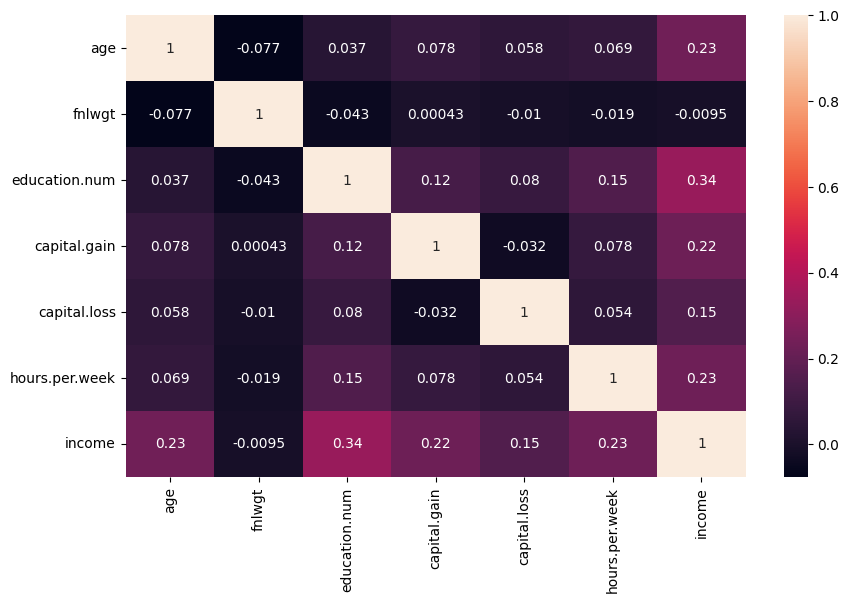

In [7]:
sns.heatmap(df.corr(), annot=True)# en yüksek corr eğitim durumu ile o da 0.34 

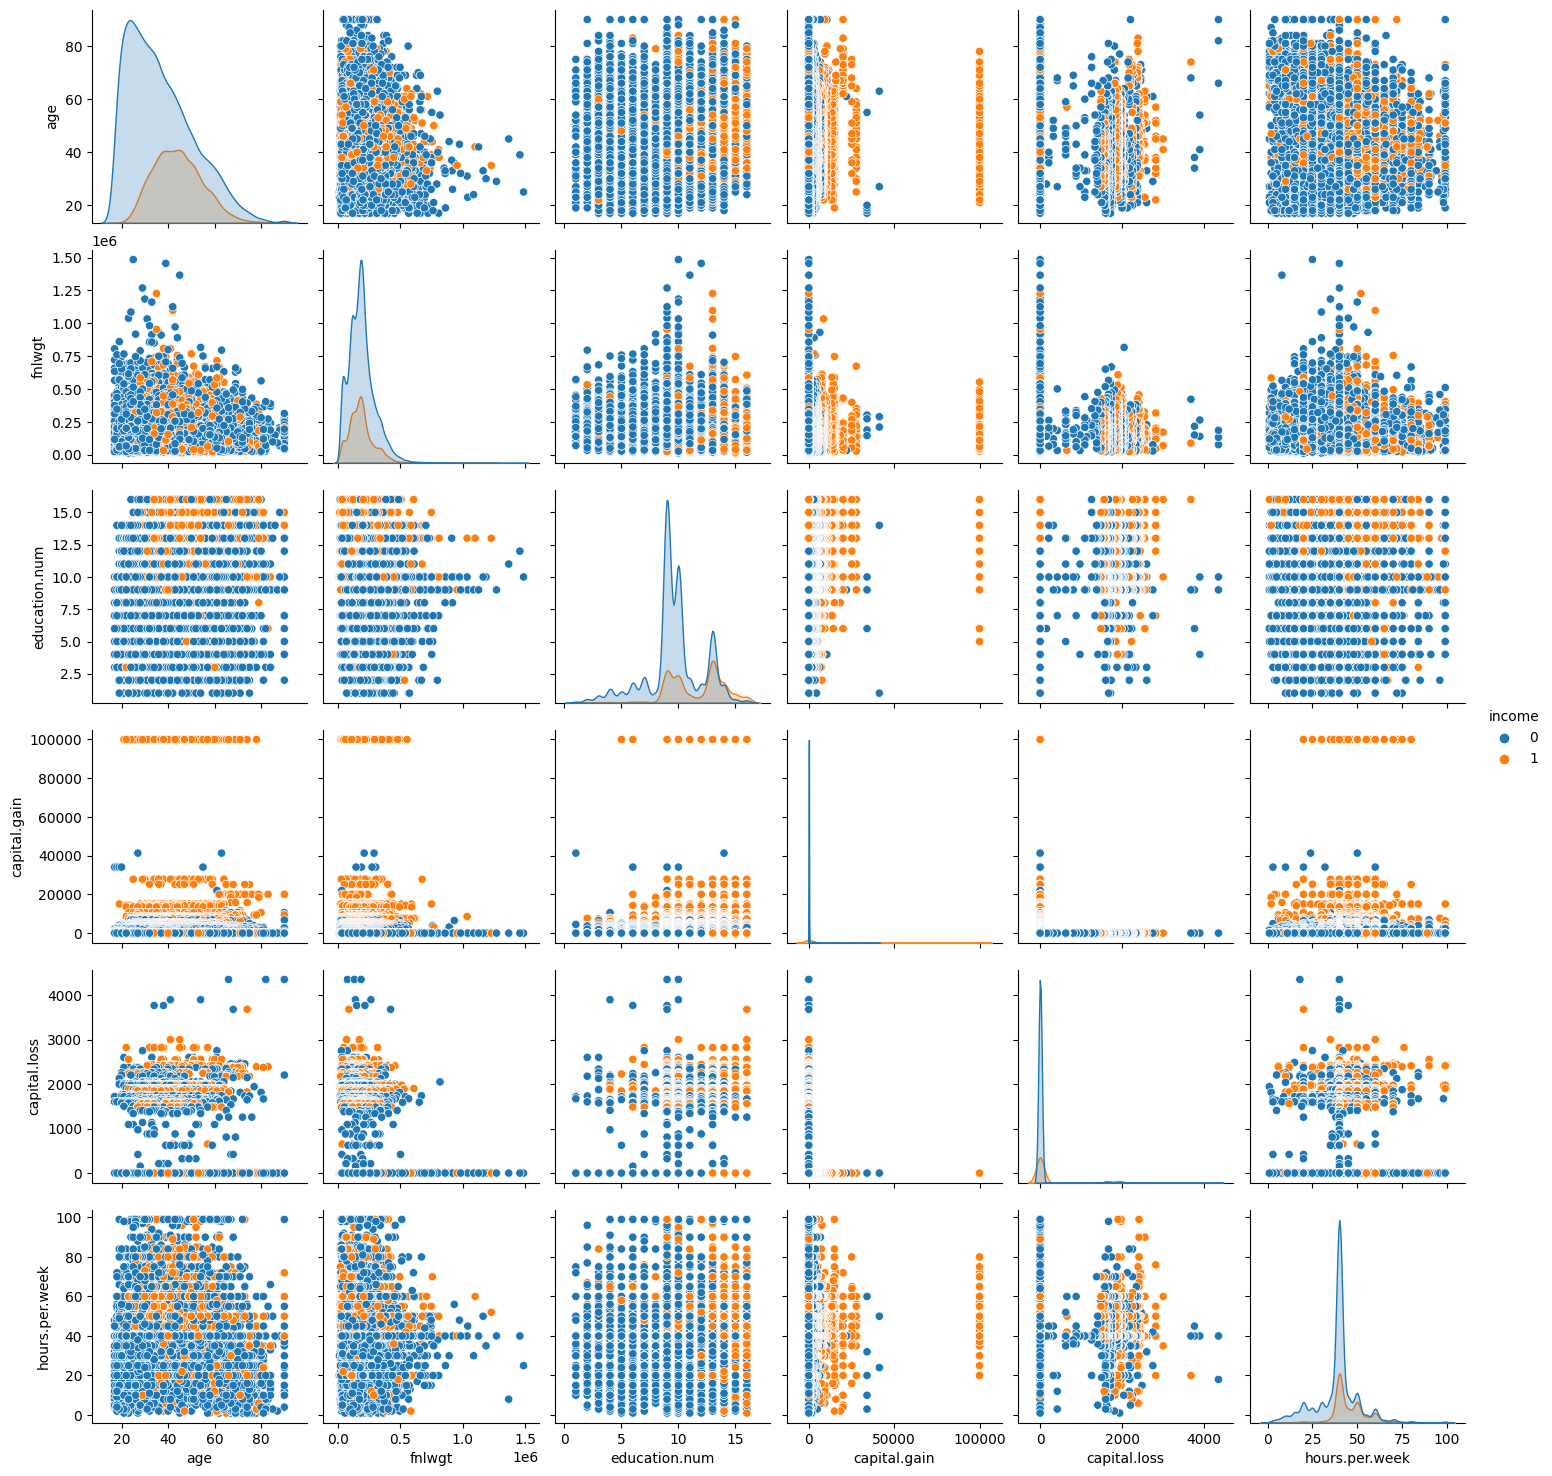

In [9]:
sns.pairplot(df, hue = "income");

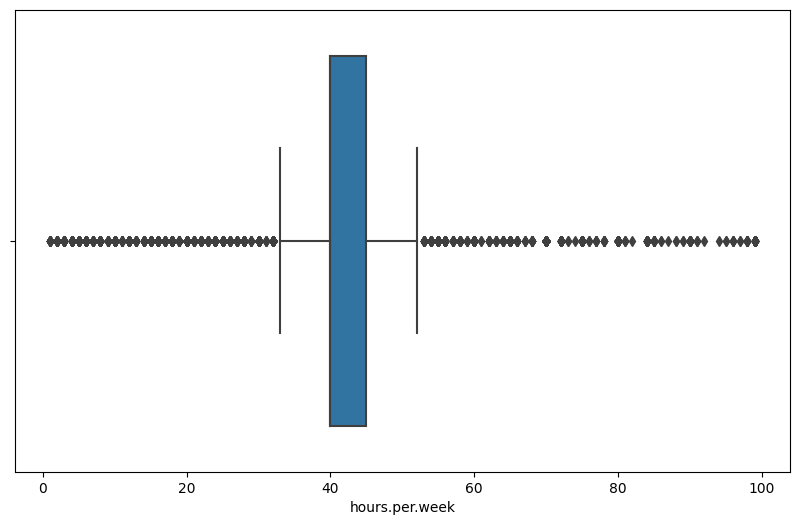

In [11]:
sns.boxplot(df["hours.per.week"]);

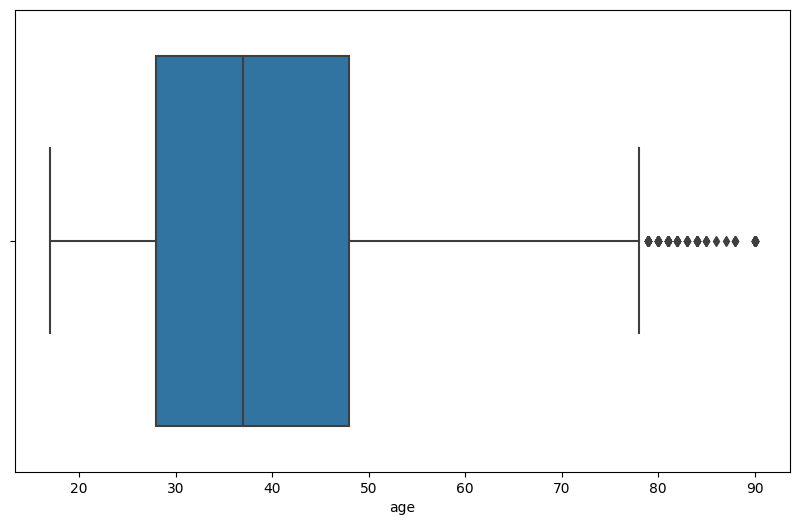

In [12]:
sns.boxplot(df.age);

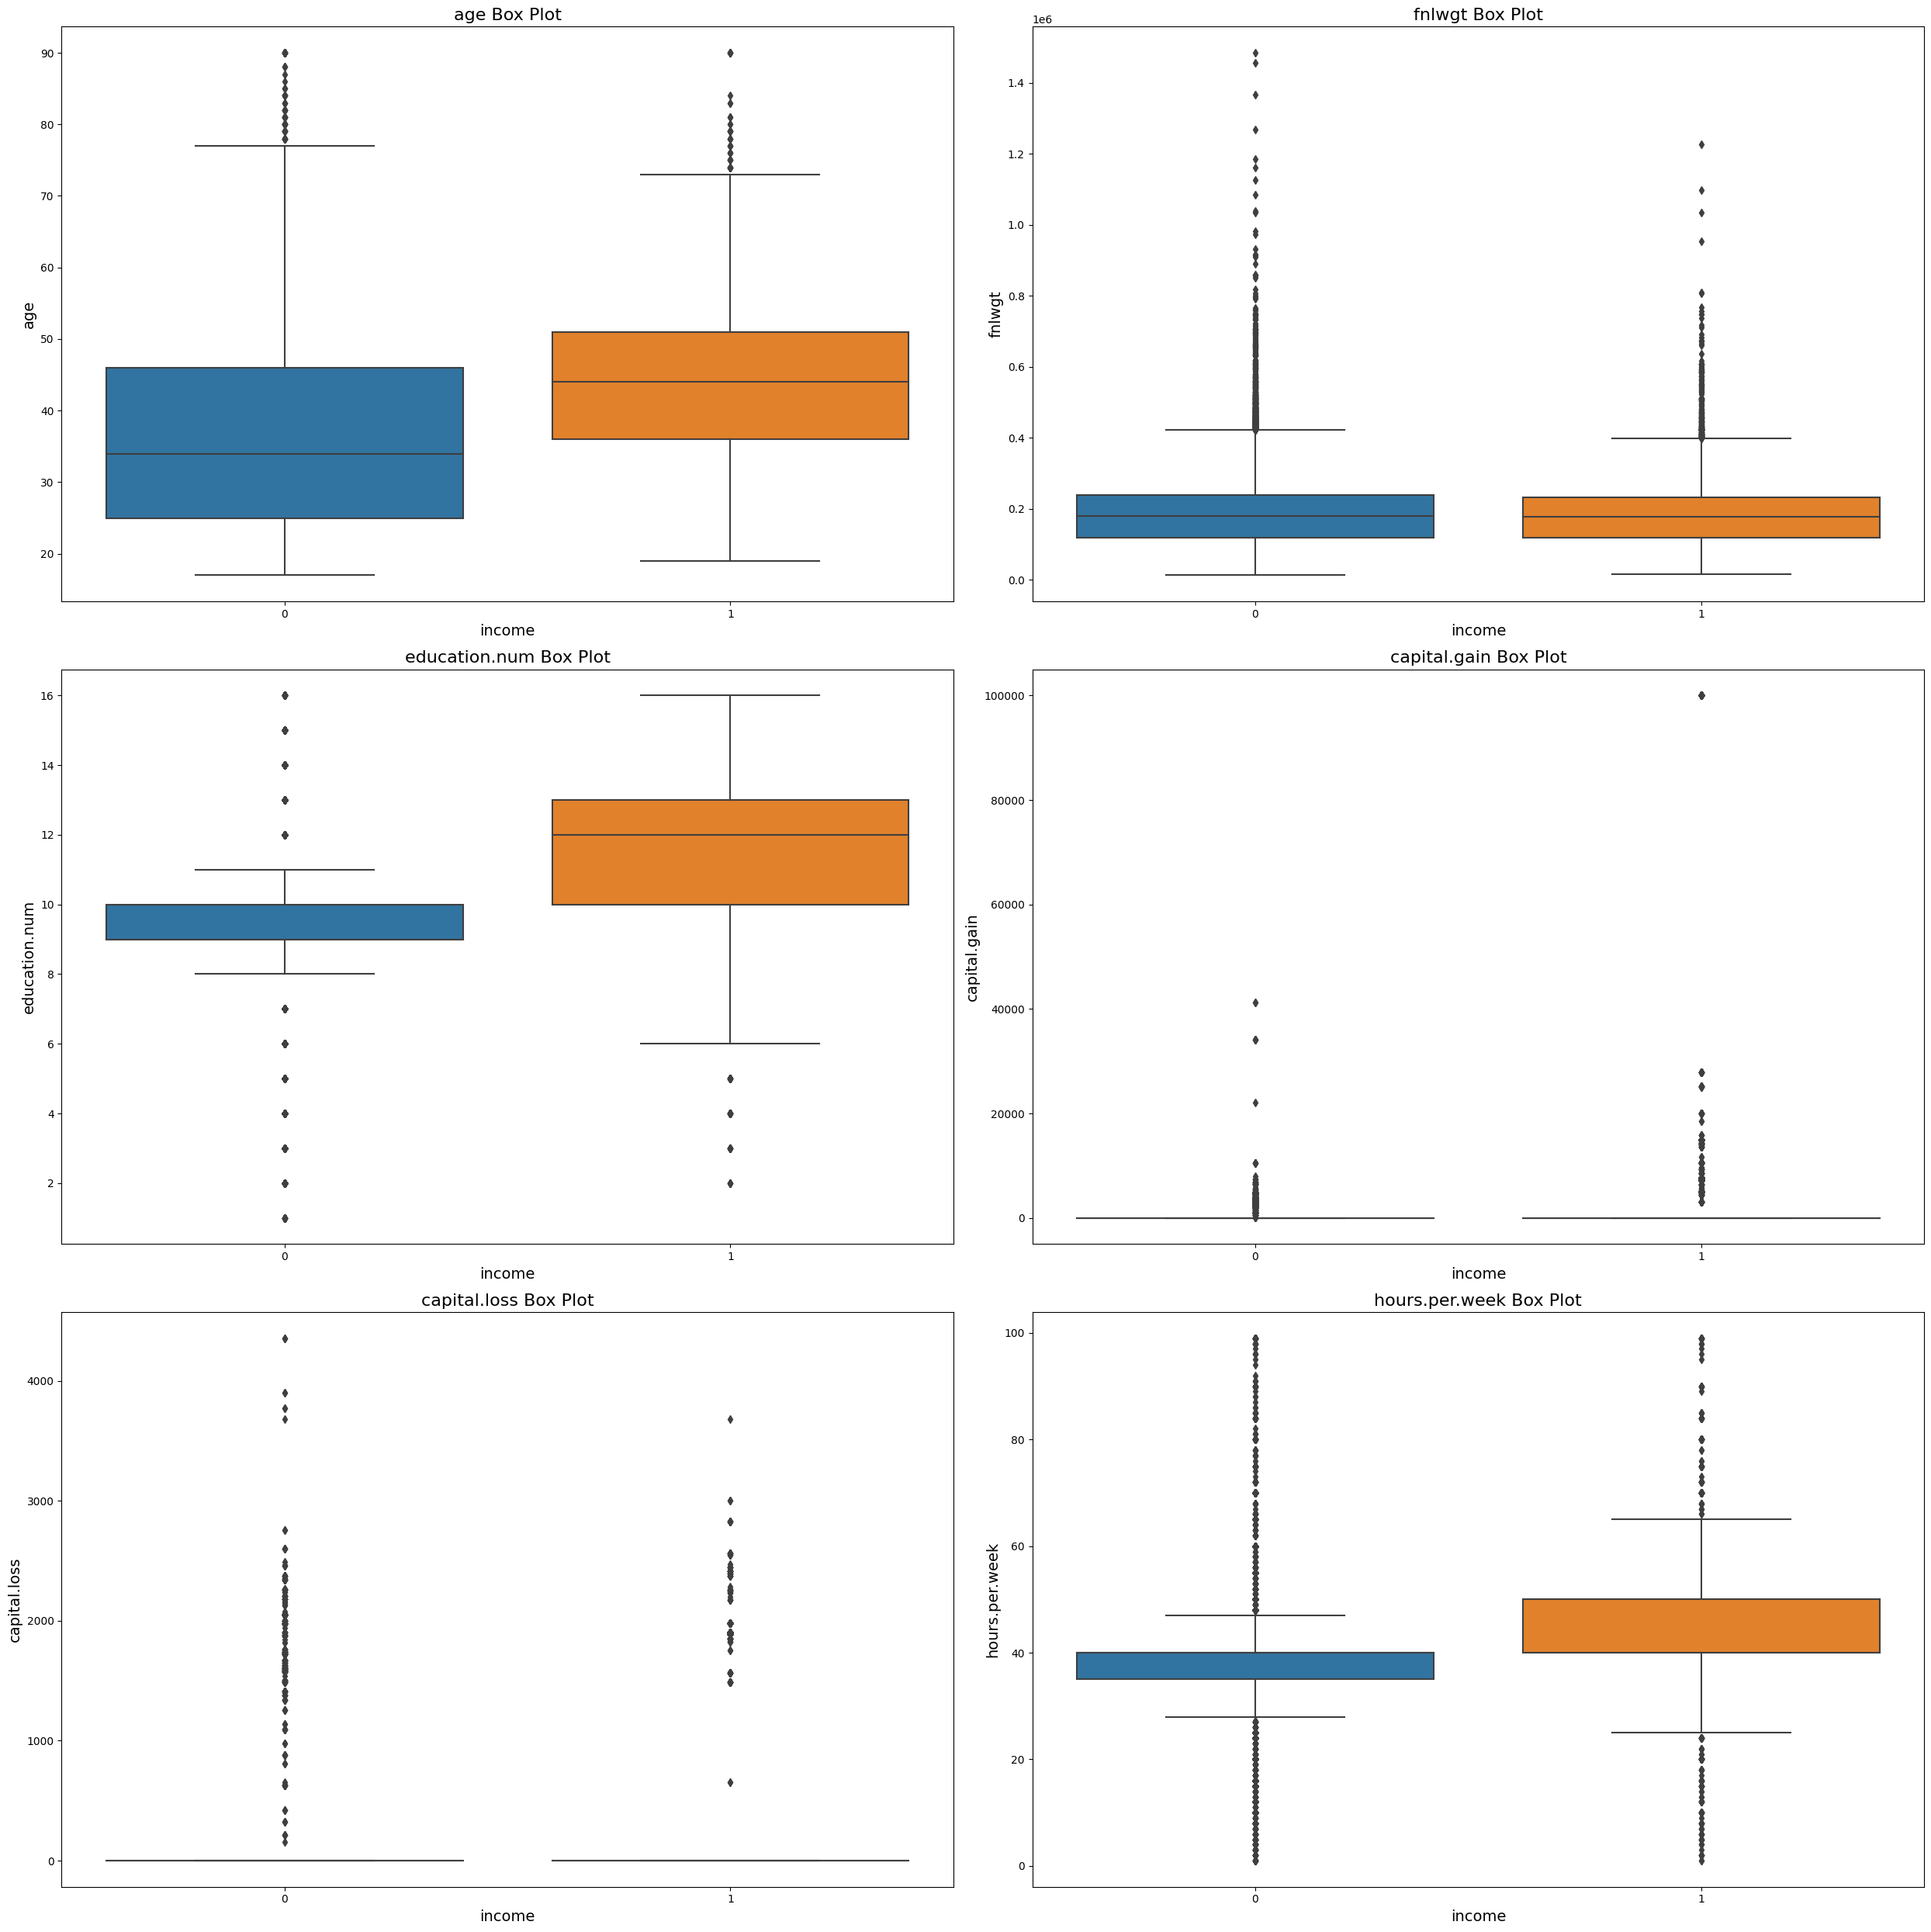

In [14]:
numeric_columns = df.select_dtypes(include=[float, int])

# 'income' sütununu listeden çıkar
numeric_columns = numeric_columns.drop(columns=['income'], errors='ignore')

# Her bir sayısal sütun için box plot grafiği çiz
plt.figure(figsize=(25, 25))
index = 0
for feature in numeric_columns.columns:
    index += 1
    plt.subplot(3, 2, index)
    sns.boxplot(x='income', y=feature, data=df)
    plt.xlabel('income')
    plt.ylabel(feature)
    plt.title(f'{feature} Box Plot')
    plt.xlabel('income', fontsize=14)  
    plt.ylabel(feature, fontsize=14)
    plt.title(f'{feature} Box Plot', fontsize=16)
plt.tight_layout()
plt.show()

### feature engineer

#### education 

In [13]:
df.groupby("education")["education.num"].value_counts(dropna= False) # iki sütunda aynı bilgileri veriyor.
                                        #education str ifadelerden oluştuğu için onu drop edeceğim. ama model education num ı ordinal algılar mı emin değilim ???

education     education.num
10th          6                  933
11th          7                 1175
12th          8                  433
1st-4th       2                  168
5th-6th       3                  333
7th-8th       4                  646
9th           5                  514
Assoc-acdm    12                1067
Assoc-voc     11                1382
Bachelors     13                5355
Doctorate     16                 413
HS-grad       9                10501
Masters       14                1723
Preschool     1                   51
Prof-school   15                 576
Some-college  10                7291
Name: education.num, dtype: int64

In [4]:
df.drop("education",axis=1,inplace=True)
df.sample()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
31239,44,Private,79864,14,Separated,Exec-managerial,Unmarried,White,Female,0,0,20,United-States,0


#### relationship

In [15]:
df.groupby("relationship")["marital.status"].value_counts(dropna= False)

relationship    marital.status       
Husband         Married-civ-spouse       13184
                Married-AF-spouse            9
Not-in-family   Never-married             4706
                Divorced                  2404
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Own-child       Never-married             4485
                Divorced                   328
                Separated                   99
                Married-civ-spouse          95
                Married-spouse-absent       45
                Widowe

married: wife,husband  / unmaried: unmaried,own-child,Not-in-family / other-relative

In [5]:
df.drop("marital.status",axis=1,inplace=True)


In [6]:
df["relationship"] = df["relationship"].replace(["Wife", "Husband"], "maried")

In [7]:
df["relationship"] = df["relationship"].replace(["Unmarried","Own-child","Not-in-family","Other-relative"], "unmaried")

In [10]:
df.head()

,age,workclass,fnlwgt,education.num,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,9,?,unmaried,White,Female,0,4356,40,United-States,0
1,82,Private,132870,9,Exec-managerial,unmaried,White,Female,0,4356,18,United-States,0
2,66,?,186061,10,?,unmaried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,4,Machine-op-inspct,unmaried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,10,Prof-specialty,unmaried,White,Female,0,3900,40,United-States,0


In [11]:
df.relationship.value_counts()

unmaried    17800
maried      14761
Name: relationship, dtype: int64

#### workclass

In [8]:
df.groupby("workclass")["occupation"].value_counts(dropna= False)

workclass    occupation       
?            ?                    1836
Federal-gov  Adm-clerical          317
             Exec-managerial       180
             Prof-specialty        175
             Tech-support           68
                                  ... 
Without-pay  Craft-repair            1
             Handlers-cleaners       1
             Machine-op-inspct       1
             Other-service           1
             Transport-moving        1
Name: occupation, Length: 83, dtype: int64

In [11]:
df.workclass.value_counts() # privet çoğunlukta private a 1 diğerlerine 0 diye gruplandırabilirm
                         # private- self -emp-seltf-emp -withoutpay : 1

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [8]:
df.workclass = df.workclass.replace(["Self-emp-not-inc","Self-emp-inc","Without-pay"],"Private")

In [9]:
df.workclass = df.workclass.replace(["?","Local-gov","State-gov","Never-worked","Federal-gov"],"others")

In [31]:
df.workclass.value_counts()

Private    26367
others      6194
Name: workclass, dtype: int64

In [12]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [14]:
df[df["workclass"] == "Private"]["occupation"].value_counts()

Craft-repair         3195
Sales                2942
Adm-clerical         2833
Other-service        2740
Exec-managerial      2691
Prof-specialty       2313
Machine-op-inspct    1913
Handlers-cleaners    1273
Transport-moving     1266
Tech-support          736
Farming-fishing       455
Protective-serv       190
Priv-house-serv       149
Name: occupation, dtype: int64

#### race

In [21]:
df.race.value_counts()   # white büyük çoğunlukta olduğu için ona göre ayırım yapacağım

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [10]:
df.race = df.race.replace(["Black","Asian-Pac-Islander","Amer-Indian-Eskimo"],"Other")

#### native.country

In [21]:
df["native.country"].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [11]:
df["native.country"] = df["native.country"].replace(['United-States', 'Canada','Mexico', 'El-Salvador',"Puerto-Rico",
                                                 'Honduras', 'Nicaragua', 'Costa-Rica', 'Panama', 'Belize',"Outlying-US(Guam-USVI-etc)",
                                                "Trinadad&Tobago","Peru","Nicaragua","Columbia","Guatemala","Dominican-Republic","South",
                                                 "Jamaica","Cuba"],"america")

In [12]:
df["native.country"] = df["native.country"].replace(['Germany', 'England', 'Italy', 'Poland', 'Portugal', 'Greece', 'France', 'Ireland', 'Hungary',
                       'Scotland', 'Holand-Netherlands',"Yugoslavia"],"europe")

In [13]:
df["native.country"] = df["native.country"].replace(["Japan","Iran","Thailand","Laos","Cambodia","Hong","Ecuador","Haiti","Taiwan",
                                                     "Vietnam","China","India","Philippines","?"],"other")

In [29]:
df["native.country"].value_counts()

america    30714
other       1326
europe       521
Name: native.country, dtype: int64

#### occupation

In [25]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [26]:
df.groupby("occupation")["workclass"].value_counts(dropna= False)

occupation        workclass   
?                 ?               1836
                  Never-worked       7
Adm-clerical      Private         2833
                  Federal-gov      317
                  Local-gov        283
                                  ... 
Transport-moving  Local-gov        115
                  State-gov         41
                  Self-emp-inc      27
                  Federal-gov       25
                  Without-pay        1
Name: workclass, Length: 83, dtype: int64

In [27]:
df[df["workclass"] == "?"][[ "capital.loss"]].value_counts() # şimdilik bu şekilde kalsın skorlarım kötü gelirse tekrar dönebilirim

capital.loss
0               1778
1602              12
1485               3
2001               3
1902               3
1721               2
2457               2
2377               2
419                2
1887               2
4356               2
1719               2
1504               2
1741               1
2205               1
2824               1
2603               1
2489               1
1258               1
2415               1
2392               1
2339               1
2206               1
2179               1
1762               1
2174               1
2163               1
2002               1
1590               1
1628               1
1668               1
1848               1
1825               1
1977               1
dtype: int64

In [14]:
df.duplicated().sum()

35

In [15]:
df = df.drop_duplicates()

In [29]:
df.income.value_counts() # unbalans bir veri seti

0    24687
1     7839
Name: income, dtype: int64

In [15]:
df.head()

,age,workclass,fnlwgt,education.num,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,others,77053,9,?,unmaried,White,Female,0,4356,40,United-States,0
1,82,Private,132870,9,Exec-managerial,unmaried,White,Female,0,4356,18,United-States,0
2,66,others,186061,10,?,unmaried,Other,Female,0,4356,40,United-States,0
3,54,Private,140359,4,Machine-op-inspct,unmaried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,10,Prof-specialty,unmaried,White,Female,0,3900,40,United-States,0


In [16]:
df.shape

(32526, 13)

In [17]:
df = pd.get_dummies((df), drop_first=True)

## last check

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32526 entries, 0 to 32560
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           32526 non-null  int64
 1   fnlwgt                        32526 non-null  int64
 2   education.num                 32526 non-null  int64
 3   capital.gain                  32526 non-null  int64
 4   capital.loss                  32526 non-null  int64
 5   hours.per.week                32526 non-null  int64
 6   income                        32526 non-null  int64
 7   workclass_others              32526 non-null  uint8
 8   occupation_Adm-clerical       32526 non-null  uint8
 9   occupation_Armed-Forces       32526 non-null  uint8
 10  occupation_Craft-repair       32526 non-null  uint8
 11  occupation_Exec-managerial    32526 non-null  uint8
 12  occupation_Farming-fishing    32526 non-null  uint8
 13  occupation_Handlers-cleaners  3

In [101]:
df.shape

(32526, 27)

### Train / Test Split

In [18]:
X = df.drop(["income"], axis = 1)

y = df.income

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)

In [28]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
reg = LazyClassifier(verbose = 0, ignore_warnings = False, custom_metric = None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
predictions

  3%|██▊                                                                                | 1/29 [00:08<03:47,  8.13s/it]

ROC AUC couldn't be calculated for AdaBoostClassifier
could not convert string to float: '<=50K'


  7%|█████▋                                                                             | 2/29 [00:15<03:28,  7.71s/it]

ROC AUC couldn't be calculated for BaggingClassifier
could not convert string to float: '>50K'


 10%|████████▌                                                                          | 3/29 [00:16<01:56,  4.50s/it]

ROC AUC couldn't be calculated for BernoulliNB
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.


 14%|███████████▍                                                                       | 4/29 [01:48<16:20, 39.21s/it]

ROC AUC couldn't be calculated for CalibratedClassifierCV
could not convert string to float: '<=50K'


 17%|██████████████▎                                                                    | 5/29 [01:48<10:04, 25.20s/it]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 21%|█████████████████▏                                                                 | 6/29 [01:50<06:33, 17.13s/it]

ROC AUC couldn't be calculated for DecisionTreeClassifier
could not convert string to float: '>50K'


 24%|████████████████████                                                               | 7/29 [01:50<04:16, 11.68s/it]

ROC AUC couldn't be calculated for DummyClassifier
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.


 28%|██████████████████████▉                                                            | 8/29 [01:51<02:51,  8.16s/it]

ROC AUC couldn't be calculated for ExtraTreeClassifier
could not convert string to float: '<=50K'


 31%|█████████████████████████▊                                                         | 9/29 [02:09<03:41, 11.07s/it]

ROC AUC couldn't be calculated for ExtraTreesClassifier
could not convert string to float: '<=50K'


 34%|████████████████████████████▎                                                     | 10/29 [02:09<02:29,  7.86s/it]

ROC AUC couldn't be calculated for GaussianNB
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.


 38%|███████████████████████████████                                                   | 11/29 [02:12<01:52,  6.27s/it]

ROC AUC couldn't be calculated for KNeighborsClassifier
could not convert string to float: '<=50K'


 41%|█████████████████████████████████▉                                                | 12/29 [05:47<19:47, 69.85s/it]

LabelPropagation model failed to execute
Unable to allocate 6.40 GiB for an array with shape (29304, 29304) and data type float64


 45%|████████████████████████████████████▎                                            | 13/29 [09:23<30:27, 114.21s/it]

LabelSpreading model failed to execute
Unable to allocate 6.40 GiB for an array with shape (29304, 29304) and data type float64


 48%|███████████████████████████████████████▌                                          | 14/29 [09:26<20:09, 80.64s/it]

ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.


 52%|██████████████████████████████████████████▍                                       | 15/29 [09:56<15:12, 65.17s/it]

ROC AUC couldn't be calculated for LinearSVC
could not convert string to float: '<=50K'


 55%|█████████████████████████████████████████████▏                                    | 16/29 [09:57<09:56, 45.87s/it]

ROC AUC couldn't be calculated for LogisticRegression
could not convert string to float: '<=50K'


 59%|████████████████████████████████████████████████                                  | 17/29 [09:57<06:26, 32.22s/it]

ROC AUC couldn't be calculated for NearestCentroid
could not convert string to float: '<=50K'


 62%|██████████████████████████████████████████████████▉                               | 18/29 [09:58<04:09, 22.66s/it]

NuSVC model failed to execute
specified nu is infeasible


 66%|█████████████████████████████████████████████████████▋                            | 19/29 [09:58<02:40, 16.05s/it]

ROC AUC couldn't be calculated for PassiveAggressiveClassifier
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.


 69%|████████████████████████████████████████████████████████▌                         | 20/29 [09:59<01:42, 11.41s/it]

ROC AUC couldn't be calculated for Perceptron
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.


 72%|███████████████████████████████████████████████████████████▍                      | 21/29 [10:00<01:06,  8.35s/it]

ROC AUC couldn't be calculated for QuadraticDiscriminantAnalysis
could not convert string to float: '>50K'


 76%|██████████████████████████████████████████████████████████████▏                   | 22/29 [10:15<01:11, 10.27s/it]

ROC AUC couldn't be calculated for RandomForestClassifier
could not convert string to float: '<=50K'


 79%|█████████████████████████████████████████████████████████████████                 | 23/29 [10:16<00:44,  7.43s/it]

ROC AUC couldn't be calculated for RidgeClassifier
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.


 83%|███████████████████████████████████████████████████████████████████▊              | 24/29 [10:17<00:28,  5.71s/it]

ROC AUC couldn't be calculated for RidgeClassifierCV
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.


 86%|██████████████████████████████████████████████████████████████████████▋           | 25/29 [10:19<00:18,  4.55s/it]

ROC AUC couldn't be calculated for SGDClassifier
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.


 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [12:00<01:40, 33.49s/it]

ROC AUC couldn't be calculated for SVC
could not convert string to float: '<=50K'
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [12:01<00:18, 18.12s/it]

XGBClassifier model failed to execute
Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['<=50K' '>50K']
[LightGBM] [Info] Number of positive: 7057, number of negative: 22247
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 737
[LightGBM] [Info] Number of data points in the train set: 29304, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240820 -> initscore=-1.148187
[LightGBM] [Info] Start training from score -1.148187


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [12:02<00:00, 24.92s/it]

ROC AUC couldn't be calculated for LGBMClassifier
could not convert string to float: '<=50K'


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.88,0.80,None,0.87,1.67
NearestCentroid,0.78,0.79,None,0.79,0.46
AdaBoostClassifier,0.87,0.79,None,0.86,8.13
RandomForestClassifier,0.86,0.78,None,0.86,14.76
CalibratedClassifierCV,0.86,0.78,None,0.86,92.42
LinearSVC,0.86,0.78,None,0.86,29.31
BernoulliNB,0.84,0.78,None,0.84,0.68
LogisticRegression,0.86,0.78,None,0.85,1.07
SGDClassifier,0.84,0.76,None,0.84,1.86


In [ ]:
#df.drop(["native.country"],axis = 1,inplace= True) # country leri drop edince log reg skorum 1  puan düştü ama countylere bir işlem yapmam gerekiyor
# çünkü bu sütun sayısı ile log modele girince çalışması çok uzun sürdü. geri dönüp gruplamaya çalışacağım.

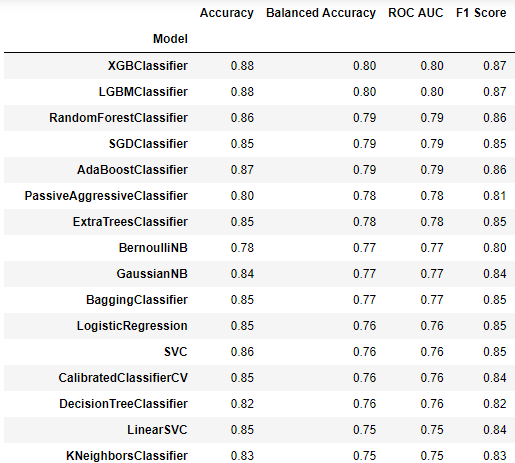

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

In [21]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.40914365, -0.13500537, -1.96899674, ...,  0.70207625,
        -0.12815464, -0.20512809],
       [-0.99637426, -0.62664022, -0.02880495, ...,  0.70207625,
        -0.12815464, -0.20512809],
       [ 0.91212523, -0.47060075, -0.41684331, ...,  0.70207625,
        -0.12815464, -0.20512809],
       ...,
       [-1.14318191,  0.43711091, -0.02880495, ...,  0.70207625,
        -0.12815464, -0.20512809],
       [-0.5559513 , -0.65064995, -0.41684331, ...,  0.70207625,
        -0.12815464, -0.20512809],
       [-1.58360487,  0.77970715, -0.02880495, ...,  0.70207625,
        -0.12815464, -0.20512809]])

In [22]:
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [23]:
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight=['balanced', None] #unbalans datalarda bunu demekte fayda var
solver = ['liblinear']
param_grid = {"log__penalty" : penalty,
             "log__C" : C,
             "log__class_weight": class_weight,
             "log__solver" : solver}


pipe_model = Pipeline(steps = [
            ("scaler", StandardScaler()), ("log", LogisticRegression())])

In [24]:
pipe_grid = GridSearchCV(estimator = pipe_model, param_grid = param_grid, cv = 5, scoring = "accuracy", n_jobs = -1)

pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'log__class_weight': ['balanced', None],
                         'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear']},
             scoring='accuracy')

In [25]:
pipe_grid.best_params_  # sınırda  çıkan bir hypre parametrem yok bu yüzden değiştirme yapmadan bu parametrelerle devam edeceğim


{'log__C': 0.20691380811147897,
 'log__class_weight': None,
 'log__penalty': 'l2',
 'log__solver': 'liblinear'}

In [26]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [27]:
eval_metric(pipe_grid, X_train, y_train, X_test, y_test)  # modelim 1 leri bulmaktaki başarısı düşük datam unbalans olduğu için

Test_Set
[[2306  163]
 [ 295  489]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2469
           1       0.75      0.62      0.68       784

    accuracy                           0.86      3253
   macro avg       0.82      0.78      0.80      3253
weighted avg       0.85      0.86      0.85      3253


Train_Set
[[20682  1536]
 [ 2882  4173]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     22218
           1       0.73      0.59      0.65      7055

    accuracy                           0.85     29273
   macro avg       0.80      0.76      0.78     29273
weighted avg       0.84      0.85      0.84     29273



- CV 10 ile aldığım sonuçlar 5 ile arasında fark yok
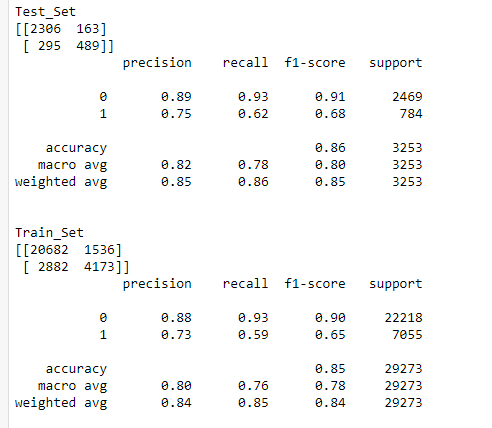

In [49]:
df.income.value_counts()

0    24687
1     7839
Name: income, dtype: int64

# K-Nearest Neighbors (KNN) Classification

In [55]:
scaler = StandardScaler()

In [56]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### ELBOW METHOD İLE K BELİRLEME

In [58]:
test_error_rates = []
train_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    train_error_rates.append(train_error)

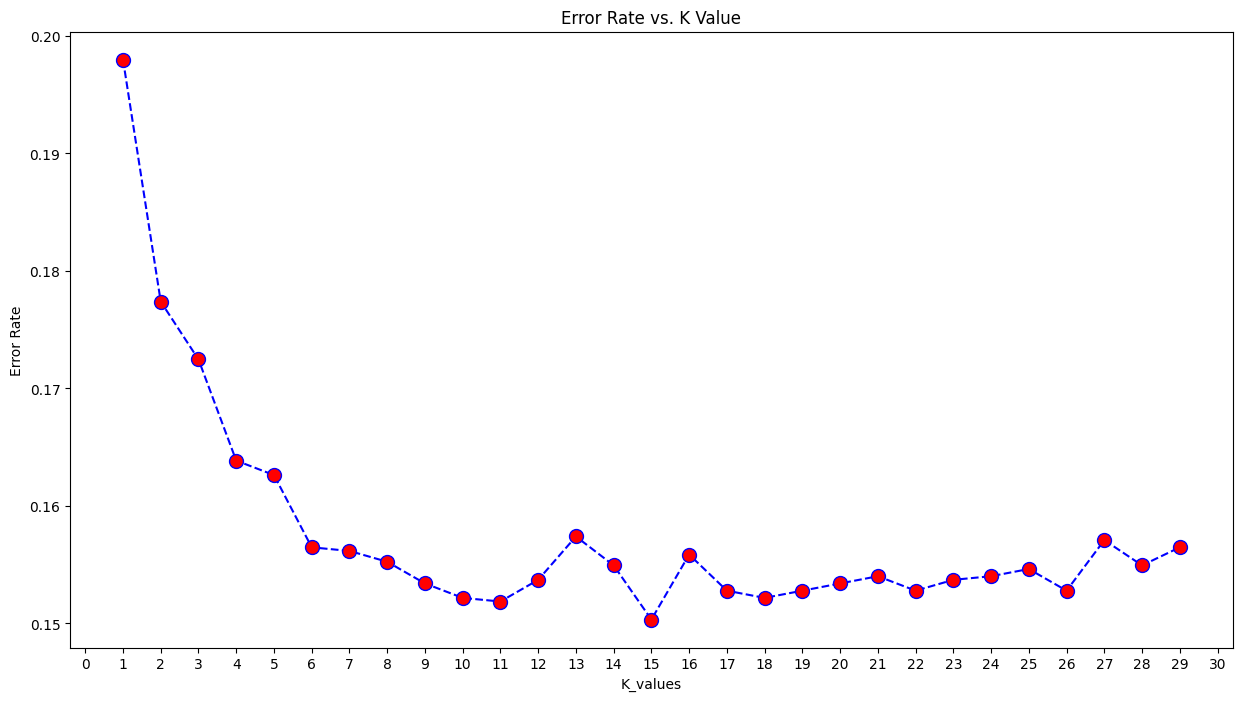

In [59]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.xticks(range(0, 31, 1));

In [60]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train_scaled,y_train)
print('WITH K=15\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=15

Test_Set
[[2300  169]
 [ 320  464]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2469
           1       0.73      0.59      0.65       784

    accuracy                           0.85      3253
   macro avg       0.81      0.76      0.78      3253
weighted avg       0.84      0.85      0.84      3253


Train_Set
[[20724  1494]
 [ 2790  4265]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     22218
           1       0.74      0.60      0.67      7055

    accuracy                           0.85     29273
   macro avg       0.81      0.77      0.79     29273
weighted avg       0.85      0.85      0.85     29273



In [62]:
knn = KNeighborsClassifier(n_neighbors=6) # az bi düşüş olmu ama maliyet açısından K= 6 ile devam edebilirm

knn.fit(X_train_scaled,y_train)
print('WITH K=6\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=6

Test_Set
[[2324  145]
 [ 364  420]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2469
           1       0.74      0.54      0.62       784

    accuracy                           0.84      3253
   macro avg       0.80      0.74      0.76      3253
weighted avg       0.84      0.84      0.83      3253


Train_Set
[[21372   846]
 [ 2932  4123]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     22218
           1       0.83      0.58      0.69      7055

    accuracy                           0.87     29273
   macro avg       0.85      0.77      0.80     29273
weighted avg       0.87      0.87      0.86     29273



In [63]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [64]:
knn_model = KNeighborsClassifier(n_neighbors=6).fit(X_train_scaled, y_train)

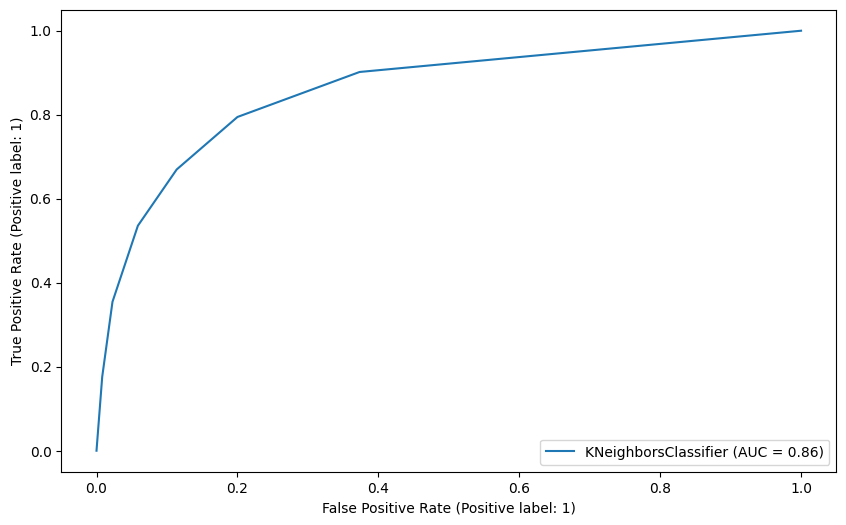

In [65]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [66]:
knn_model = KNeighborsClassifier(n_neighbors=15).fit(X_train_scaled, y_train)

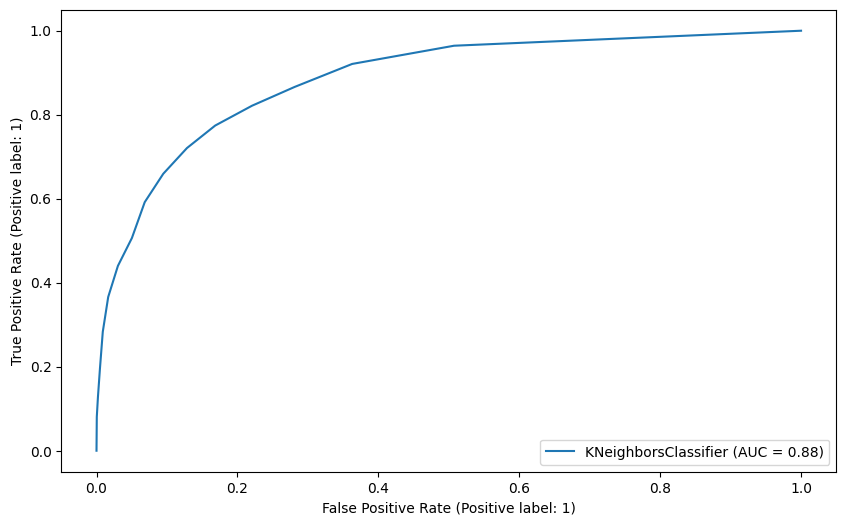

In [67]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [69]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]

In [71]:
param_grid = {'knn__n_neighbors': range(1,20)}
pipe_model = Pipeline(steps=operations)

In [72]:
pipe_grid = GridSearchCV(pipe_model, param_grid, cv=5, scoring= 'f1')

In [73]:
pipe_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 20)}, scoring='f1')

In [74]:
pipe_grid.best_params_

{'knn__n_neighbors': 9}

In [75]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train_scaled,y_train)
print('WITH K=9\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test) # ????  0 ve 1 ler arasında bu kadar fark olması kabul edilebilir mi ??

WITH K=9

Test_Set
[[2289  180]
 [ 319  465]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2469
           1       0.72      0.59      0.65       784

    accuracy                           0.85      3253
   macro avg       0.80      0.76      0.78      3253
weighted avg       0.84      0.85      0.84      3253


Train_Set
[[20812  1406]
 [ 2556  4499]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     22218
           1       0.76      0.64      0.69      7055

    accuracy                           0.86     29273
   macro avg       0.83      0.79      0.80     29273
weighted avg       0.86      0.86      0.86     29273



In [76]:
knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)

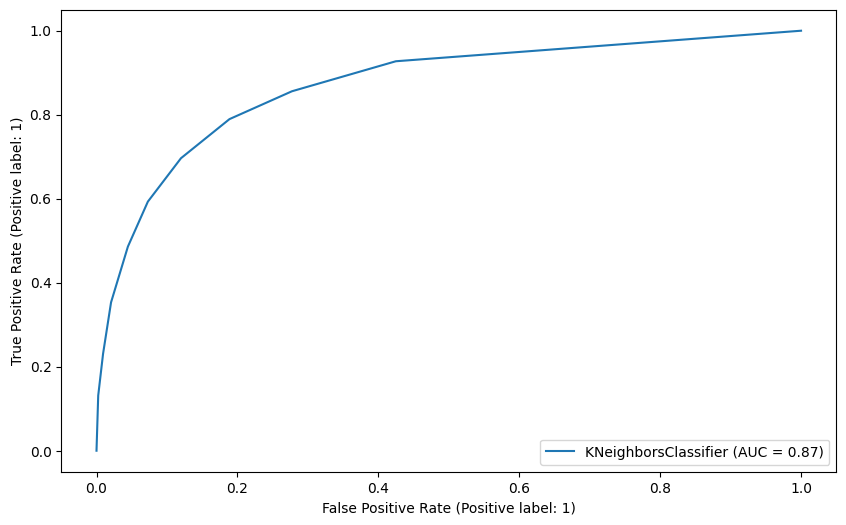

In [77]:
plot_roc_curve(knn_model, X_test_scaled, y_test) # k = 6 ya göre daha iyi sonuçlar verdi hata sayım test verilerinde 10 tane daha düştü.
                          # maliyet açısından da k= 9 ile çok fark yok bu yüzden final modele k= 9 ile girebilirm

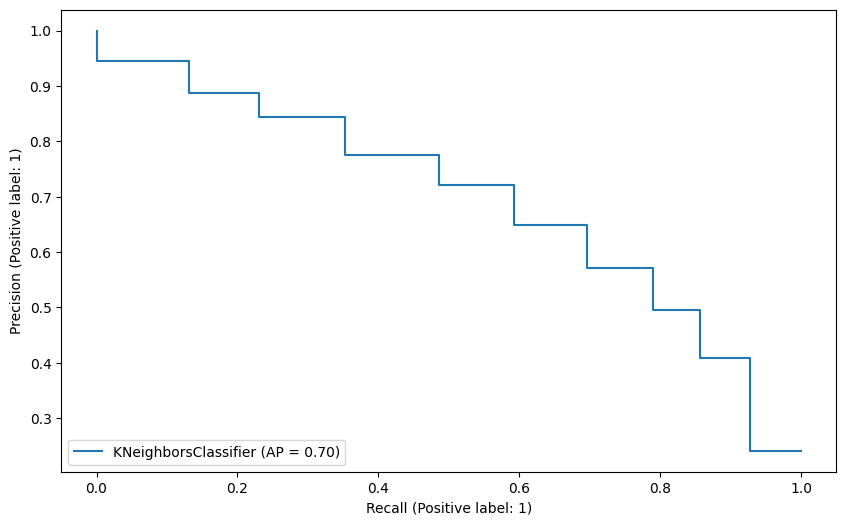

In [78]:
plot_precision_recall_curve(knn_model, X_test_scaled, y_test); 

# Decision Tree Classification

In [26]:
DT_model = DecisionTreeClassifier(random_state = 101) 

In [27]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [30]:
from yellowbrick.classifier import ClassPredictionError

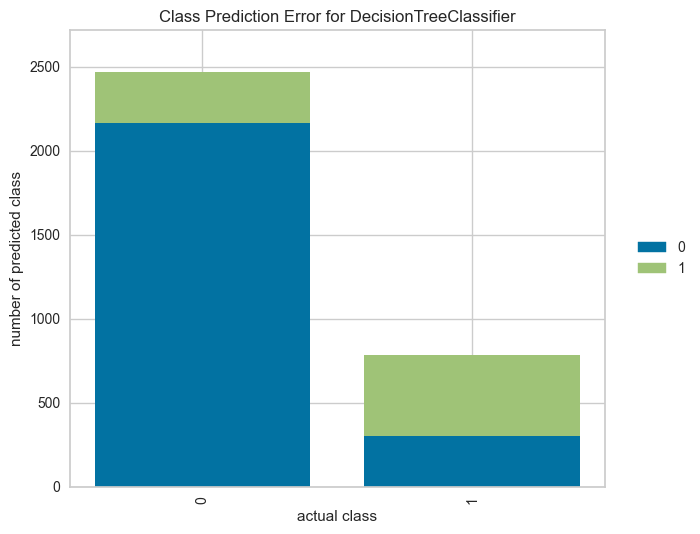

In [31]:
visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();


In [34]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set
[[2164  305]
 [ 302  482]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2469
           1       0.61      0.61      0.61       784

    accuracy                           0.81      3253
   macro avg       0.74      0.75      0.75      3253
weighted avg       0.81      0.81      0.81      3253


Train_Set
[[22218     0]
 [    2  7053]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22218
           1       1.00      1.00      1.00      7055

    accuracy                           1.00     29273
   macro avg       1.00      1.00      1.00     29273
weighted avg       1.00      1.00      1.00     29273



In [35]:
DT_model.feature_importances_

array([0.1243964 , 0.21986321, 0.12835108, 0.10566648, 0.03972529,
       0.06505094, 0.01477074, 0.00622658, 0.        , 0.00682912,
       0.01048736, 0.00365308, 0.00383082, 0.00443147, 0.00487116,
       0.        , 0.00853184, 0.00386168, 0.00907749, 0.00417078,
       0.00476441, 0.20014731, 0.01069896, 0.01097999, 0.00432522,
       0.00528861])

In [36]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
occupation_Priv-house-serv,0.000000
occupation_Armed-Forces,0.000000
occupation_Farming-fishing,0.003653
occupation_Handlers-cleaners,0.003831
occupation_Protective-serv,0.003862
occupation_Tech-support,0.004171
native.country_europe,0.004325
occupation_Machine-op-inspct,0.004431
occupation_Transport-moving,0.004764
occupation_Other-service,0.004871


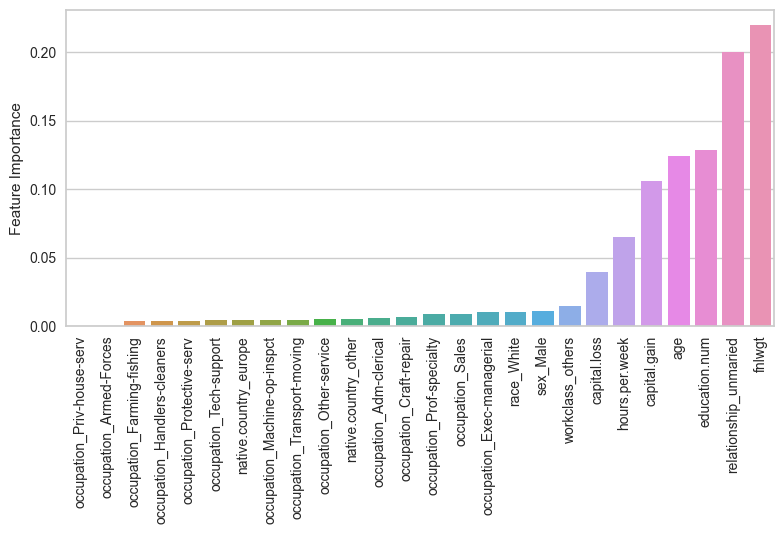

In [37]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [38]:
X2 = X.drop(columns = ["fnlwgt"], axis =1)

In [39]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.1, random_state=101,stratify=y)

In [40]:
DT2_model = DecisionTreeClassifier(random_state=101)

In [41]:
DT2_model.fit(X_train2, y_train2)

DecisionTreeClassifier(random_state=101)

In [43]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2) # en önemli feature u düşürünce skorlarım az da olsa iyileşti.
                                                   #conf matriste test datasında 25 tane daha fazla doğru bildi

Test_Set
[[2198  271]
 [ 311  473]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2469
           1       0.64      0.60      0.62       784

    accuracy                           0.82      3253
   macro avg       0.76      0.75      0.75      3253
weighted avg       0.82      0.82      0.82      3253


Train_Set
[[22062   156]
 [  802  6253]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     22218
           1       0.98      0.89      0.93      7055

    accuracy                           0.97     29273
   macro avg       0.97      0.94      0.95     29273
weighted avg       0.97      0.97      0.97     29273



In [49]:
model = DecisionTreeClassifier(max_depth=None, random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = ("recall","f1","precision","accuracy"), cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]   # cv ile recall ve f1 skorlarım biraz düştü

test_recall       0.596744
test_f1           0.615019
test_precision    0.634822
test_accuracy     0.820107
dtype: float64

In [51]:
from sklearn.tree import plot_tree

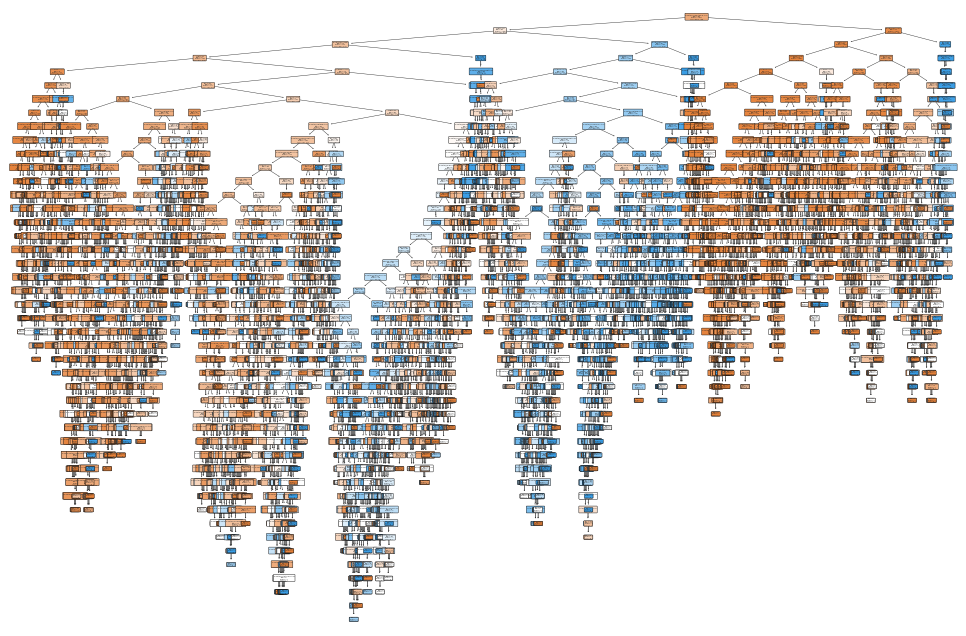

In [54]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(DT2_model, filled=True, feature_names=X.columns, rounded = True);
plt.show()

In [61]:
operations = [("scaler",StandardScaler()),("DT", DecisionTreeClassifier())] # pipe model de hyper parametre ayarları yapıp skorlarıma bakacağım

param_grid = {"DT__splitter": ["best"],
    "DT__max_features": [None, "auto", "log2", 2, 3, 4, 5, 6, 7],
    "DT__max_depth": [None, 2, 3, 4, 5],
    "DT__min_samples_leaf": [1, 2, 3, 4, 5, 6, 7],
    "DT__min_samples_split": [2, 3, 5, 6, 7, 8, 9]}


pipe_model = Pipeline(steps = operations)

pipe_model_grid = GridSearchCV(pipe_model,param_grid,scoring= "f1_micro",cv=5,n_jobs= -1)

In [24]:
pipe_model_grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('DT', DecisionTreeClassifier())]),
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best']},
             scoring='recall')>

In [62]:
pipe_model_grid.fit(X_train2,y_train2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('DT', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'DT__max_depth': [None, 2, 3, 4, 5],
                         'DT__max_features': [None, 'auto', 'log2', 2, 3, 4, 5,
                                              6, 7],
                         'DT__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'DT__min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'DT__splitter': ['best']},
             scoring='f1_micro')

In [63]:
pipe_model_grid.best_params_

{'DT__max_depth': None,
 'DT__max_features': 5,
 'DT__min_samples_leaf': 7,
 'DT__min_samples_split': 3,
 'DT__splitter': 'best'}

In [64]:
eval_metric(pipe_model_grid, X_train2, y_train2, X_test2, y_test2)  # f1 skorlarım yükseldi ve
                                                              #conf matriste 98 tane daha doğru sayım arttı

Test_Set
[[2284  185]
 [ 299  485]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2469
           1       0.72      0.62      0.67       784

    accuracy                           0.85      3253
   macro avg       0.80      0.77      0.79      3253
weighted avg       0.85      0.85      0.85      3253


Train_Set
[[20644  1574]
 [ 2485  4570]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     22218
           1       0.74      0.65      0.69      7055

    accuracy                           0.86     29273
   macro avg       0.82      0.79      0.80     29273
weighted avg       0.86      0.86      0.86     29273



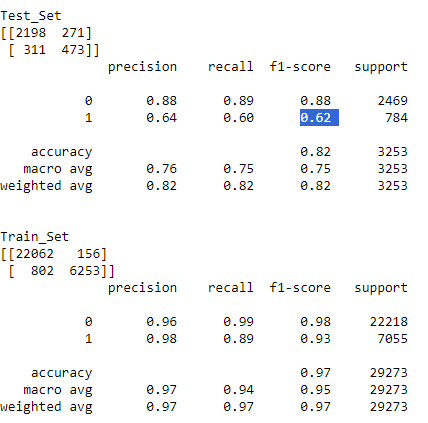

         1 classına göre;

log_reg = 0.75  precission, 0.62 recall, f1 0.68

KNN'de  = 0.72  precission, 0.59 recall, f1 0.65 

DT      = 0.72  precission, 0.62 recall, f1 0.67        # bu skorlara göre log_reg nu tercih edebilirim.                                 